In [15]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

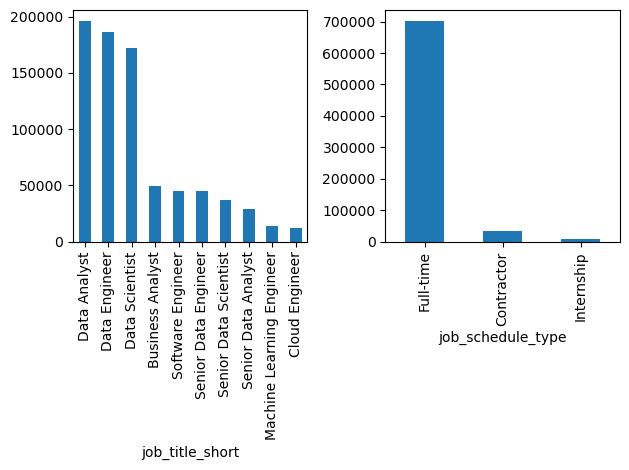

In [16]:
fig, ax = plt.subplots(1,2)

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1])

fig.tight_layout()

In [22]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_title_short", "job_skills"])["job_skills"].size()
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


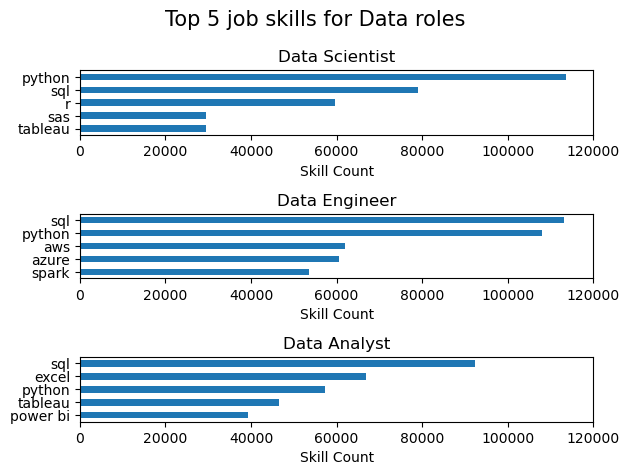

In [50]:
fig, ax = plt.subplots(3,1)
top_3 = ["Data Scientist", "Data Engineer", "Data Analyst"]
for i,job_title in enumerate (top_3):
    job = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    job.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 120000)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("Skill Count")
    ax[i].legend().set_visible(False)

fig.suptitle("Top 5 job skills for Data roles", fontsize = 15)
fig.tight_layout()